[{'Date': 'Wed Aug 15 21:57:06 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 1}, {'Date': 'Wed Aug 15 21:50:04 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 2}, {'Date': 'Wed Aug 15 21:43:06 +0000 2018', 'Compound': 0.296, 'Positive': 0.189, 'Negative': 0.684, 'Neutral': 0.126, 'Tweets Ago': 3}, {'Date': 'Wed Aug 15 21:36:03 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 4}, {'Date': 'Wed Aug 15 21:29:07 +0000 2018', 'Compound': 0.7506, 'Positive': 0.368, 'Negative': 0.632, 'Neutral': 0.0, 'Tweets Ago': 5}, {'Date': 'Wed Aug 15 21:22:02 +0000 2018', 'Compound': -0.5096, 'Positive': 0.0, 'Negative': 0.77, 'Neutral': 0.23, 'Tweets Ago': 6}, {'Date': 'Wed Aug 15 21:15:11 +0000 2018', 'Compound': 0.0387, 'Positive': 0.057, 'Negative': 0.943, 'Neutral': 0.0, 'Tweets Ago': 7}, {'Date': 'Wed Aug 15 21:08:06 +0000 2018', 'Compound': 0.1779, 'Positive': 

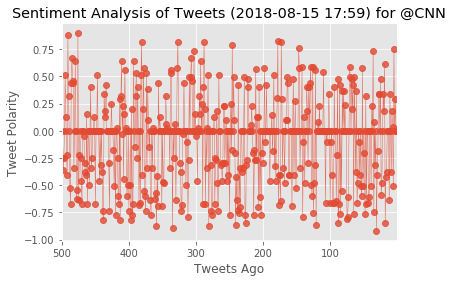

NameError: name 'true' is not defined

In [2]:
# Dependencies
import tweepy
import time
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

target_user = "@CNN"
public_tweets = api.user_timeline(target_user)
tweet_id = public_tweets[0]["id"]
api.retweet(tweet_id)


def analyzeTweets():
    # Counter
    counter = 1

    # Variables for holding sentiments
    sentiments = []

    # Variable for max_id
    oldest_tweet = None
    
    for x in range(25):
         # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, max_id=oldest_tweet)
        
        # Loop through all tweets 
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            
             # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1
    
    print(sentiments)
    
    # Convert sentiments to DataFrame
    sentiments_pd = pd.DataFrame.from_dict(sentiments)
    sentiments_pd.head 
    
    
    # Create plot
    x_vals = sentiments_pd["Tweets Ago"]
    y_vals = sentiments_pd["Compound"]
    plt.plot(x_vals,y_vals, marker="o", linewidth=0.5, alpha=0.8)

    # # Incorporate the other graph properties
    now = datetime.now()
    now = now.strftime("%Y-%m-%d %H:%M")
    plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
    plt.xlim([x_vals.max(),x_vals.min()]) 
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.savefig("twitterBot_output.png")
    plt.show()
    
    api.update_with_media("twitterBot_output.png")
        
analyzeTweets() 

while(true):
    analyzeTweets()
    time.sleep(300)
            
